# DIGIT RECOGNITION 

--------------------------------------------------------------------------------------------------------------------------

IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import  metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

--------------------------------------------------------------------------------------------------------------------------

LOAD DATASET

In [2]:
train = pd.read_csv('C:\\Users\\IPSITA\\Desktop\\DR\\train.csv')
test = pd.read_csv('C:\\Users\\IPSITA\\Desktop\\DR\\test.csv')

In [3]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---------------------------------------------------------------------------------------------------------------------------

PLOT BETWEEN NUMERIC VALUE AND ITS FREQUENCY IN TRAINING DATA

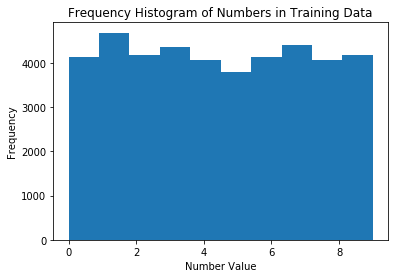

In [5]:
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")
plt.show()

---------------------------------------------------------------------------------------------------------------------------

SEPARATING LABEL FROM DATA

In [6]:
label_train=train['label']
train=train.drop('label', axis=1)

In [7]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
label_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

-------------------------------------------------------------

VISUALISING DATA

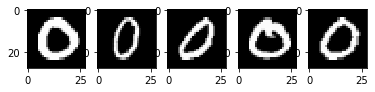

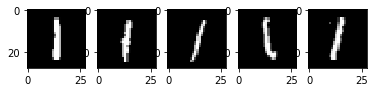

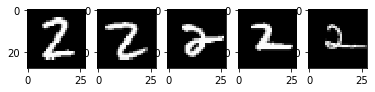

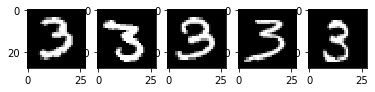

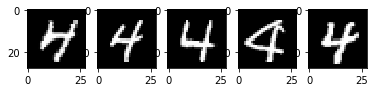

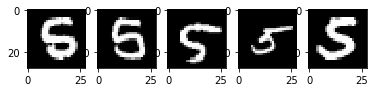

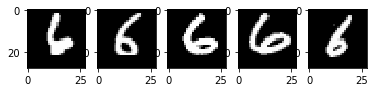

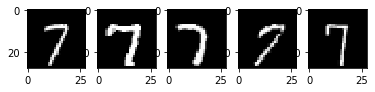

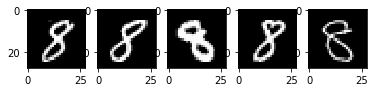

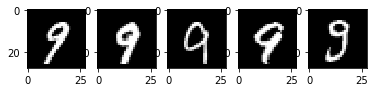

In [9]:
for x in range(0,10):
    train_0=train[label_train==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,6):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

---------------------------------------------------------------------------------------------------------------------------

DATA NORMALISATION

In [10]:
train = train/255
test = test/255

---------------------------------------------------------------------------------------------------------------------------

In [ ]:
np.cov(train)

In [ ]:
w, v = LA.eig(train)

In [ ]:
print("Eigenvalues of train data:",w)
print("Eigenvectors of train data",v)

SPLITTING TRAIN INTO TRAIN AND VALIDATION SET

In [11]:
X_train, X_val, y_train, y_val = train_test_split(train, label_train, train_size = 0.8,random_state = 42)

PCA

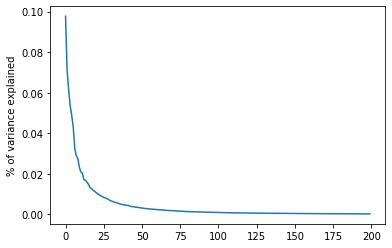

In [12]:
## PCA decomposition
pca = PCA(n_components=200) #Finds first 200 PCs
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.show()

Plot reaches asymptote at around 100, which is optimal number of PCs to use.

In [13]:
## PCA decomposition with optimal number of PCs
# decompose train data
pca = PCA(n_components=100)
pca.fit(X_train)
PCtrain = pca.transform(X_train)
PCval = pca.transform(X_val)
#decompose test data
PCtest = pca.transform(test)

In [14]:
X_train= PCtrain

In [15]:
X_cv = PCval

---------------------------------------------------------------------------------------------------------------------------

SVM

In [16]:
svc = SVC()
svc.fit(X_train,y_train)

C:\Users\IPSITA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
predicted = svc.predict(X_cv)
expected = y_val

In [18]:
print(predicted[0:30])

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 3 6 4 8 5 2 6 0 0 0 8 6 3]


In [19]:
print("Classification report for classifier %s:\n%s\n"
      % (svc, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.97      0.95      0.96       937
           4       0.95      0.97      0.96       839
           5       0.97      0.97      0.97       702
           6       0.98      0.98      0.98       785
           7       0.97      0.96      0.97       893
           8       0.97      0.97      0.97       835
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg    

In [20]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9703571428571428


In [21]:
output_label = svc.predict(PCtest)

In [22]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


-------------------------------------------------------------------------------------------------------------------------

KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
predicted = knn.predict(X_cv)
expected = y_val

In [25]:
print(predicted[0:30])

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 3 6 4 9 5 2 6 0 0 0 8 6 3]


In [26]:
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(expected, predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.96      1.00      0.98       909
           2       0.98      0.96      0.97       846
           3       0.97      0.96      0.97       937
           4       0.99      0.96      0.97       839
           5       0.96      0.96      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.95      0.97       835
           9       0.94      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400




In [27]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9695238095238096


In [28]:
output_label = knn.predict(PCtest)

In [29]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


---------------------------------------------------------------------------------------------------------------------------

RANDOM FOREST

In [30]:
rf = RandomForestClassifier(max_features=35, max_depth=1000, random_state=0)
rf.fit(X_train,y_train)

C:\Users\IPSITA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=35, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
predicted = rf.predict(X_cv)
expected = y_val

In [32]:
print(predicted[0:30])

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 3 6 4 8 5 2 6 0 0 0 8 6 3]


In [33]:
print("Classification report for classifier %s:\n%s\n"
      % (rf, metrics.classification_report(expected, predicted)))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=35, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       816
           1       0.96      0.98      0.97       909
           2       0.90      0.91      0.91       846
           3       0.89      0.89      0.89       937
           4       0.89      0.91      0.90       839
           5       0.87      0.88      0.87       702
           6       0.94      0.94      0.94       785
           7       0.91      0.90      0.91   

In [34]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9094047619047619


In [35]:
output_label = rf.predict(PCtest)

In [36]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2


---------------------------------------------------------------------------------------------------------------------------

XgBOOST

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
predicted = xgb.predict(X_cv)
expected = y_val

In [39]:
print(predicted[0:30])

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 6 3 3 6 4 8 5 2 6 0 0 0 8 6 3]


In [40]:
print("Classification report for classifier %s:\n%s\n"
      % (xgb, metrics.classification_report(expected, predicted)))

Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.97      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.88      0.87      0.88       937
           4       0.88      0.90      0.89       839
           5       0.85      0.88      0.87       702
           6       0.93      0.94      0.93       785
           7       0.93      0.91      0.92       893
      

In [41]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9073809523809524


In [42]:
output_label = xgb.predict(PCtest)

In [43]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


------------------------------------------------------------------------------------------------------------------------

LOGISTIC REGRESSION

In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\IPSITA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IPSITA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predicted = lr.predict(X_cv)
expected = y_val

In [46]:
print(predicted[0:30])

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 3 6 4 8 5 2 6 0 0 0 8 6 3]


In [47]:
print("Classification report for classifier %s:\n%s\n"
      % (lr, metrics.classification_report(expected, predicted)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       816
           1       0.95      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.91      0.87      0.89       937
           4       0.90      0.92      0.91       839
           5       0.84      0.84      0.84       702
           6       0.92      0.97      0.94       785
           7       0.92      0.92      0.92       893
           8       0.89      0.84      0.86       835
           9       0.87      0.88      0.88       838

    accuracy                           0.

In [48]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9084523809523809


In [49]:
output_label = lr.predict(PCtest)

In [50]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


--------------------------------------------------------------------------------------------------------------------------

MULTI LAYER PERCEPTRON

In [51]:
mlp=MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
predicted = mlp.predict(X_cv)
expected = y_val

In [53]:
print(predicted[0:30])

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 3 6 4 3 5 2 6 0 0 0 8 6 3]


In [54]:
print("Classification report for classifier %s:\n%s\n"
      % (mlp, metrics.classification_report(expected, predicted)))

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.98      0.96      0.97       846
           3       0.97      0.97      0.97       937
           4       0.97      0.97      0.97       839
           5       0.97      0.97      0.97       702
           6       0.97      0.98      0.98       785
           7       0.97      0.9

In [55]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9745238095238096


In [56]:
output_label = mlp.predict(PCtest)

In [57]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


--------------------------------------------------------------------------------------------------------------------------

NAIVE BAYES

In [58]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
predicted = gnb.predict(X_cv)
expected = y_val

In [60]:
print(predicted[0:30])

[8 1 9 7 8 6 2 2 7 1 6 3 1 2 7 9 3 3 6 4 0 5 2 6 0 0 0 8 6 3]


In [61]:
print("Classification report for classifier %s:\n%s\n"
      % (gnb, metrics.classification_report(expected, predicted)))

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       816
           1       0.98      0.95      0.96       909
           2       0.74      0.86      0.79       846
           3       0.86      0.83      0.85       937
           4       0.88      0.84      0.86       839
           5       0.77      0.86      0.81       702
           6       0.92      0.89      0.90       785
           7       0.93      0.85      0.89       893
           8       0.85      0.87      0.86       835
           9       0.83      0.84      0.84       838

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.88      0.87      0.87      8400




In [62]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.8710714285714286


In [63]:
output_label = gnb.predict(PCtest)

In [64]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


--------------------------------------------------------------------------------------------------------------------------